In [78]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [69]:
df1 = pd.read_csv("D:\Data Scrape Renote11\dataset-renot11\satu.csv")
df2 = pd.read_csv("D:\Data Scrape Renote11\dataset-renot11\dua.csv")
df3 = pd.read_csv("D:\Data Scrape Renote11\dataset-renot11\-tiga.csv")
df4 = pd.read_csv("D:\Data Scrape Renote11\dataset-renot11\empat.csv")
df5 = pd.read_csv("D:\Data Scrape Renote11\dataset-renot11\lima.csv")
df6 = pd.read_csv("D:\Data Scrape Renote11\dataset-renot11\enam.csv")


In [70]:
df = pd.concat([df1, df2, df3, df4, df5, df6])

In [130]:
pd.options.display.max_rows=1000 #mengubah setingan default max rows
pd.options.display.max_colwidth=1000
df #cek data per baris 60, apa ada masalah header

,#,Product Name,Product URL,Price,Category,Reviews,Sold,Views,Rating,Seller Name,Seller URL,Location,Error
0,1,XIAOMI REDMI NOTE 4X 4/64GB,https://www.tokopedia.com/daystoresid/xiaomi-redmi-note-4x-4-64gb,905000,Android OS,7,33,5356,4.4,daystore_id,https://www.tokopedia.com/daystoresid,Jakarta Pusat,False
1,2,Redmi Note 11 4/128 Gb New Garansi Resmi,https://www.tokopedia.com/archive-bilqissaditya/redmi-note-11-4-128-gb-new-garansi-resmi,2430000,Android OS,67,211,1247,5.0,Century Fast,https://www.tokopedia.com/archive-bilqissaditya,Kota Surakarta,False
2,3,Redmi Note 11 4/128 GB Garansi Resmi Xiaomi Indonesia - READY,https://www.tokopedia.com/newsantbrinashop/redmi-note-11-4-128-gb-garansi-resmi-xiaomi-indonesia-ready,2440000,Android OS,35,134,1068,5.0,NewSantBrina Shop,https://www.tokopedia.com/newsantbrinashop,Kota Surakarta,False
3,4,Xiaomi Redmi Note 11 4/128 GB Garansi Resmi - Twilight Blue,https://www.tokopedia.com/abiansimon/xiaomi-redmi-note-11-4-128-gb-garansi-resmi-twilight-blue,2459000,Android OS,24,87,620,5.0,Abian Simon Official,https://www.tokopedia.com/abiansimon,Kota Surakarta,False
4,5,Redmi Note 11 4/128 Gb garansi resmi - Star blue,https://www.tokopedia.com/maritsa22/redmi-note-11-4-128-gb-garansi-resmi-star-blue,2435000,Android OS,31,123,600,5.0,maritsa_store,https://www.tokopedia.com/maritsa22,Kab. Karanganyar,False
5,6,Redmi Note 11 4/128 GB Garansi Resmi - Star Blue,https://www.tokopedia.com/pandemicponsel/redmi-note-11-4-128-gb-garansi-resmi-star-blue,2450000,Android OS,15,96,597,5.0,Pandemic Ponsel,https://www.tokopedia.com/pandemicponsel,Kab. Karanganyar,False
6,7,Xiaomi Redmi Note 11 4/128 GB Garansi Resmi - Promo,https://www.tokopedia.com/gudang-hp/xiaomi-redmi-note-11-4-128-gb-garansi-resmi-promo,2481000,Android OS,123,553,17696,5.0,Gudang-HP,https://www.tokopedia.com/gudang-hp,Jakarta Pusat,False
7,8,Xiaomi Redmi Note 11 4/128 GB - Garansi Resmi Xiaomi Indonesia - Graphite Gray,https://www.tokopedia.com/universestore/xiaomi-redmi-note-11-4-128-gb-garansi-resmi-xiaomi-indonesia-graphite-gray,2469000,Android OS,44,190,2261,5.0,Universe Store,https://www.tokopedia.com/universestore,Jakarta Utara,False
8,9,XIAOMI REDMI NOTE 11 - 4GB 128GB 4/128 SNAPDRAGON 680 - GARANSI RESMI - Graphite Gray,https://www.tokopedia.com/shopyzid/xiaomi-redmi-note-11-4gb-128gb-4-128-snapdragon-680-garansi-resmi-graphite-gray,2459900,Android OS,15,68,1625,5.0,Shopyz ID,https://www.tokopedia.com/shopyzid,Jakarta Timur,False
9,10,Xiaomi Redmi Note 11 4/128 GB Garansi Resmi - Random,https://www.tokopedia.com/erwinnugrawati/xiaomi-redmi-note-11-4-128-gb-garansi-resmi-random,2434950,Android OS,64,312,1217,5.0,Erwin Nugrawati,https://www.tokopedia.com/erwinnugrawati,Kab. Ponorogo,False


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338 entries, 0 to 60
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   #             338 non-null    int64  
 1   Product Name  338 non-null    object 
 2   Product URL   338 non-null    object 
 3   Price         338 non-null    int64  
 4   Category      338 non-null    object 
 5   Reviews       338 non-null    int64  
 6   Sold          338 non-null    int64  
 7   Views         338 non-null    int64  
 8   Rating        338 non-null    float64
 9   Seller Name   338 non-null    object 
 10  Seller URL    338 non-null    object 
 11  Location      338 non-null    object 
 12  Error         338 non-null    bool   
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 32.8+ KB


<AxesSubplot:ylabel='Density'>

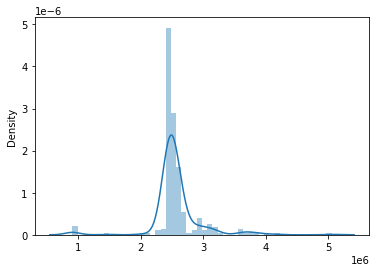

In [118]:
# cek gambaran umum data berdasar harga
df_price = df.loc[:, ['Price']]
sns.distplot(df_price.sort_values(by=['Price'], ascending=True, axis=0))

In [113]:
# dari distplot terlihat ada outlier
# lihat seluruh harga yang diurutkan
df_price = df.sort_values(by=['Price'], ascending=True, axis=0)
df_price

,#,Product Name,Product URL,Price,Category,Reviews,Sold,Views,Rating,Seller Name,Seller URL,Location,Error
0,1,XIAOMI REDMI NOTE 4X 4/64GB,https://www.tokopedia.com/daystoresid/xiaomi-redmi-note-4x-4-64gb,905000,Android OS,7,33,5356,4.4,daystore_id,https://www.tokopedia.com/daystoresid,Jakarta Pusat,False
0,1,XIAOMI REDMI NOTE 4X 4/64GB,https://www.tokopedia.com/daystoresid/xiaomi-redmi-note-4x-4-64gb,905000,Android OS,7,33,5356,4.4,daystore_id,https://www.tokopedia.com/daystoresid,Jakarta Pusat,False
0,1,XIAOMI REDMI NOTE 4X 4/64GB,https://www.tokopedia.com/daystoresid/xiaomi-redmi-note-4x-4-64gb,905000,Android OS,7,33,5356,4.4,daystore_id,https://www.tokopedia.com/daystoresid,Jakarta Pusat,False
0,1,XIAOMI REDMI NOTE 4X 4/64GB,https://www.tokopedia.com/daystoresid/xiaomi-redmi-note-4x-4-64gb,905000,Android OS,7,33,5356,4.4,daystore_id,https://www.tokopedia.com/daystoresid,Jakarta Pusat,False
0,1,XIAOMI REDMI NOTE 4X 4/64GB,https://www.tokopedia.com/daystoresid/xiaomi-redmi-note-4x-4-64gb,905000,Android OS,7,33,5356,4.4,daystore_id,https://www.tokopedia.com/daystoresid,Jakarta Pusat,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,22,Xiaomi Redmi Note 11 Ram 4 Gb 6 Gb Internal 128 Gb NFC Garansi Resmi,https://www.tokopedia.com/hinatasel/xiaomi-redmi-note-11-ram-4-gb-6-gb-internal-128-gb-nfc-garansi-resmi,3818000,Android OS,0,0,0,0.0,hinatasel shop,https://www.tokopedia.com/hinatasel,Jakarta Selatan,False
15,16,XIAOMI REDMI NOTE 11 NFC 4GB+128GB - 6GB+128GB [ESPANSI RAM 6GB+2GB] - Grey 4/128,https://www.tokopedia.com/rakkabuming/xiaomi-redmi-note-11-nfc-4gb-128gb-6gb-128gb-espansi-ram-6gb-2gb-grey-4-128,3863000,Android OS,0,0,0,0.0,Rakkabuming,https://www.tokopedia.com/rakkabuming,Jakarta Barat,False
11,12,Note Xiaomi 1 - 4 128GB Tahun 6 128GB Redmi Garansi 11,https://www.tokopedia.com/archive-jkewek-1632494736/note-xiaomi-1-4-128gb-tahun-6-128gb-redmi-garansi-11,4000620,Android OS,0,0,2,0.0,jkewek,https://www.tokopedia.com/archive-jkewek-1632494736,Kota Banjarmasin,False
27,28,SALE REDMI NOTE 11 4/128 GARANSI RESMI NEW,https://www.tokopedia.com/angeltoko2/sale-redmi-note-11-4-128-garansi-resmi-new,4159000,Android OS,0,0,0,0.0,angel toko2,https://www.tokopedia.com/angeltoko2,Jakarta Barat,False


In [77]:
# dari hasil di atas terlihat ada beberapa produk yang tidak kita ingingkan(noisy data)
# gambaran umum data berdasar nama produk
df_name = df.loc[:, ['Product Name']]
df_name.describe() #sepertinya ada produk lain selain xiaomi redmi note 11

,Product Name
count,338
unique,278
top,Xiaomi Redmi Note 11 4/128 GB Garansi Resmi
freq,11


In [72]:
#belum bisa disimpulkan terdapat 278 nama produk yang berbeda, karena produk yang sama memiliki kombinasi nama yang beda
#mencoba menyaring produk yang saya ingingkan, redmi note 11.
#karena satu produk memiliki banyak kombinasi, maka saya cari pattern yang sesuai dg produk dan kombinasinya
pat1 = r"[note][ ][11]" 
pat2 = r"[Note][ ][11]" 
pat3 = r"[NOTE][ ][11]" 

df_pat1 = df.loc[df['Product Name'].str.contains(pat1), ['Product Name','Price', 'Category', 'Seller Name', 'Location', 'Product URL']] 
df_pat2 = df.loc[df['Product Name'].str.contains(pat2), ['Product Name','Price', 'Category', 'Seller Name', 'Location', 'Product URL']]
df_pat3 = df.loc[df['Product Name'].str.contains(pat3), ['Product Name','Price', 'Category', 'Seller Name', 'Location', 'Product URL']]

df_filtered = pd.concat([df_pat1, df_pat3], ignore_index=True) #pat1 dan pat2 itu menghasilkan hal yang sama. lihat simulasi di bawah

pd.options.display.max_rows=10

df_filtered = df_filtered.sort_values(by=['Price'], axis=0, ascending=True)
df_filtered

,Product Name,Price,Category,Seller Name,Location,Product URL
143,"Infinix Hot 11 4/64 Bukan Redmi Note 9 9c 9t Poco M3 10 10s 6/128 - Warna Random, InfHot 11s 4/64",2000000,Android OS,Best Sale Shop,Kota Semarang,https://www.tokopedia.com/bestsale/infinix-hot-11-4-64-bukan-redmi-note-9-9c-9t-poco-m3-10-10s-6-128-warna-random-infhot-11s-4-64
219,Xiaomi Redmi Note 11 4GB+128GB - 6GB+128GB (Espansi Ram 6GB+2GB),2124150,Android OS,Sutar y,Jakarta Barat,https://www.tokopedia.com/sutary/xiaomi-redmi-note-11-4gb-128gb-6gb-128gb-espansi-ram-6gb-2gb
33,Redmi Note 11 4/128 Garansi Juni 2023 Like New Fullset Ori,2275000,Android OS,RIKORA,Kota Surakarta,https://www.tokopedia.com/rikora/redmi-note-11-4-128-garansi-juni-2023-like-new-fullset-ori
34,Redmi Note 11 4/128 Garansi Juni 2023 Like New Full Ori,2290000,Android OS,RIKORA,Kota Surakarta,https://www.tokopedia.com/rikora/redmi-note-11-4-128-garansi-juni-2023-like-new-full-ori
289,XIAOMI REDMI NOTE 11 RAM 4/128 GB GARANSI RESMI BNOB,2300000,Android OS,blitzzzzzz,Kota Surabaya,https://www.tokopedia.com/blitzzzzzz/xiaomi-redmi-note-11-ram-4-128-gb-garansi-resmi-bnob
...,...,...,...,...,...,...
164,Xiaomi Redmi Note 11 Pro Ram 8/128GB,3800000,Android OS,Dessy_Cell,Kota Depok,https://www.tokopedia.com/oyonkun/xiaomi-redmi-note-11-pro-ram-8-128gb
166,Xiaomi Redmi Note 11 Ram 4 Gb 6 Gb Internal 128 Gb NFC Garansi Resmi,3818000,Android OS,hinatasel shop,Jakarta Selatan,https://www.tokopedia.com/hinatasel/xiaomi-redmi-note-11-ram-4-gb-6-gb-internal-128-gb-nfc-garansi-resmi
293,XIAOMI REDMI NOTE 11 NFC 4GB+128GB - 6GB+128GB [ESPANSI RAM 6GB+2GB] - Grey 4/128,3863000,Android OS,Rakkabuming,Jakarta Barat,https://www.tokopedia.com/rakkabuming/xiaomi-redmi-note-11-nfc-4gb-128gb-6gb-128gb-espansi-ram-6gb-2gb-grey-4-128
298,SALE REDMI NOTE 11 4/128 GARANSI RESMI NEW,4159000,Android OS,angel toko2,Jakarta Barat,https://www.tokopedia.com/angeltoko2/sale-redmi-note-11-4-128-garansi-resmi-new


In [57]:
# masih terdapat produk yang tidak kita ingin, maka hapus
df_filtered = df_filtered.drop([143]) #hapus Infinix Hot 11 4/64 Bukan Redmi Note 9...
df_filtered

,Product Name,Price,Category,Seller Name,Location,Product URL
219,Xiaomi Redmi Note 11 4GB+128GB - 6GB+128GB (Espansi Ram 6GB+2GB),2124150,Android OS,Sutar y,Jakarta Barat,https://www.tokopedia.com/sutary/xiaomi-redmi-note-11-4gb-128gb-6gb-128gb-espansi-ram-6gb-2gb
33,Redmi Note 11 4/128 Garansi Juni 2023 Like New Fullset Ori,2275000,Android OS,RIKORA,Kota Surakarta,https://www.tokopedia.com/rikora/redmi-note-11-4-128-garansi-juni-2023-like-new-fullset-ori
34,Redmi Note 11 4/128 Garansi Juni 2023 Like New Full Ori,2290000,Android OS,RIKORA,Kota Surakarta,https://www.tokopedia.com/rikora/redmi-note-11-4-128-garansi-juni-2023-like-new-full-ori
289,XIAOMI REDMI NOTE 11 RAM 4/128 GB GARANSI RESMI BNOB,2300000,Android OS,blitzzzzzz,Kota Surabaya,https://www.tokopedia.com/blitzzzzzz/xiaomi-redmi-note-11-ram-4-128-gb-garansi-resmi-bnob
308,XIAOMI REDMI NOTE 11 NO REPACK,2360000,Android OS,NegroToko1,Kab. Tulungagung,https://www.tokopedia.com/negrotoko1/xiaomi-redmi-note-11-no-repack
...,...,...,...,...,...,...
164,Xiaomi Redmi Note 11 Pro Ram 8/128GB,3800000,Android OS,Dessy_Cell,Kota Depok,https://www.tokopedia.com/oyonkun/xiaomi-redmi-note-11-pro-ram-8-128gb
166,Xiaomi Redmi Note 11 Ram 4 Gb 6 Gb Internal 128 Gb NFC Garansi Resmi,3818000,Android OS,hinatasel shop,Jakarta Selatan,https://www.tokopedia.com/hinatasel/xiaomi-redmi-note-11-ram-4-gb-6-gb-internal-128-gb-nfc-garansi-resmi
293,XIAOMI REDMI NOTE 11 NFC 4GB+128GB - 6GB+128GB [ESPANSI RAM 6GB+2GB] - Grey 4/128,3863000,Android OS,Rakkabuming,Jakarta Barat,https://www.tokopedia.com/rakkabuming/xiaomi-redmi-note-11-nfc-4gb-128gb-6gb-128gb-espansi-ram-6gb-2gb-grey-4-128
298,SALE REDMI NOTE 11 4/128 GARANSI RESMI NEW,4159000,Android OS,angel toko2,Jakarta Barat,https://www.tokopedia.com/angeltoko2/sale-redmi-note-11-4-128-garansi-resmi-new


In [66]:
# dari hasil di atas kita tau mengapa ada produk dengan harga yang tidak umum, salah satunya karena terdapat produk yg tdk kita ingin(noisy data) salah satunya redmi note 11 pro, maka hapus
pat_pro1 = "Pro "

df_pro1 = df_filtered.loc[df_filtered['Product Name'].str.contains(pat_pro1), ['Product Name','Price', 'Category', 'Seller Name', 'Location', 'Product URL']]

pd.options.display.max_rows=10

df_pro1


,Product Name,Price,Category,Seller Name,Location,Product URL


In [59]:
df_filtered = df_filtered.drop([119]) #Xiaomi Redmi Note 11 Pro 8GB + 128GB Garansi Resmi Xiaomi Indonesia - Polar White	
df_filtered = df_filtered.drop([164]) #Xiaomi Redmi Note 11 Pro Ram 8/128GB

pd.options.display.max_rows=400
df_filtered

,Product Name,Price,Category,Seller Name,Location,Product URL
219,Xiaomi Redmi Note 11 4GB+128GB - 6GB+128GB (Espansi Ram 6GB+2GB),2124150,Android OS,Sutar y,Jakarta Barat,https://www.tokopedia.com/sutary/xiaomi-redmi-note-11-4gb-128gb-6gb-128gb-espansi-ram-6gb-2gb
33,Redmi Note 11 4/128 Garansi Juni 2023 Like New Fullset Ori,2275000,Android OS,RIKORA,Kota Surakarta,https://www.tokopedia.com/rikora/redmi-note-11-4-128-garansi-juni-2023-like-new-fullset-ori
34,Redmi Note 11 4/128 Garansi Juni 2023 Like New Full Ori,2290000,Android OS,RIKORA,Kota Surakarta,https://www.tokopedia.com/rikora/redmi-note-11-4-128-garansi-juni-2023-like-new-full-ori
289,XIAOMI REDMI NOTE 11 RAM 4/128 GB GARANSI RESMI BNOB,2300000,Android OS,blitzzzzzz,Kota Surabaya,https://www.tokopedia.com/blitzzzzzz/xiaomi-redmi-note-11-ram-4-128-gb-garansi-resmi-bnob
308,XIAOMI REDMI NOTE 11 NO REPACK,2360000,Android OS,NegroToko1,Kab. Tulungagung,https://www.tokopedia.com/negrotoko1/xiaomi-redmi-note-11-no-repack
261,(GRATIS ONGKIR) Xiaomi Redmi Note 11 (4Gb+128GB) Garansi Resmi,2390000,Android OS,Good Merchant,Kota Tangerang,https://www.tokopedia.com/goodmerchant/gratis-ongkir-xiaomi-redmi-note-11-4gb-128gb-garansi-resmi
279,XIAOMI REDMI NOTE 11 RAM 4GB - 128GB GARANSI RESMI BY XIAOMI - Twilight Blue,2395000,Android OS,BUDI CATUAZ-X,Jakarta Barat,https://www.tokopedia.com/budicatuaz-x/xiaomi-redmi-note-11-ram-4gb-128gb-garansi-resmi-by-xiaomi-twilight-blue
44,Xiaomi Redmi Note 11 4/128 GB 4/128GB - Garansi Resmi Xiaomi Indonesia - Graphite Gray,2396999,Android OS,Prayogi96,Kab. Tangerang,https://www.tokopedia.com/yogi96/xiaomi-redmi-note-11-4-128-gb-4-128gb-garansi-resmi-xiaomi-indonesia-graphite-gray
178,Xiaomi redmi note 11 4/128 GB garansi resmi,2399000,Android OS,RedysStrore,Kota Yogyakarta,https://www.tokopedia.com/redysstrore/xiaomi-redmi-note-11-4-128-gb-garansi-resmi
122,Redmi Note 11 4/128 gb Garansi Resmi NoRepack - Second,2400000,Android OS,Namindo,Kab. Bantul,https://www.tokopedia.com/namindo/redmi-note-11-4-128-gb-garansi-resmi-norepack-second


In [98]:
# dari hasil di atas, terdapat beberapa data yang memiliki nama produk yang membingungkan dan harganya tidak wajar

# gunakan ini untuk SIMULASI
pat1 = r"[note][ ][11]" 
pat2 = r"[Note][ ][11]" 
pat3 = r"[NOTE][ ][11]" 
pat4 = "Note 11" 
pat5 = "note 11"
pat6 = "NOTE 11"
pat7 = "pro"
pat8 = "Pro"
pat9 = "PRO"
pat10 = r"[ ][pro]"
pat11 = r"[ ][PRO]"

x = pd.Series(['note 11', 'Note 11', 'NOTE 11', 'redmi note 11 pro', ' Pro', ' PRO', 'anot'])
x.str.contains(pat11)


0    False
1    False
2    False
3    False
4     True
5     True
6    False
dtype: bool

<AxesSubplot:xlabel='Price', ylabel='Density'>

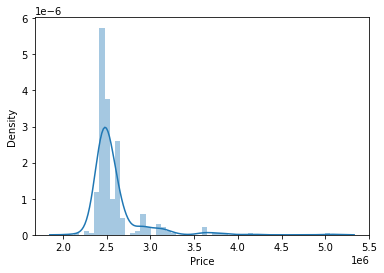

In [61]:
sns.distplot(df_filtered['Price'])

In [62]:
# dari gambar dist. frek. terlihat terdapat outlier
# jika dilihat dengan data harga yang sudah diurutkan di atas, terlihat bahwa beberapa outlier(right tail) memeiliki nama yang membingungkan
# melihat tail kanan
pd.options.display.max_rows=100
df_right_tail = df_filtered.loc[df_filtered['Price']>3000000, ['Product Name', 'Price', 'Category', 'Seller Name', 'Location', 'Product URL']]
df_right_tail.sort_values(by=['Price'], axis=0, ascending=True)

,Product Name,Price,Category,Seller Name,Location,Product URL
312,accessories XIAOMI REDMI NOTE 11 RAM 4GB-128GB Snapdragon 680 GARANSI,3076000,Android OS,Rahardianto shop,Kota Surabaya,https://www.tokopedia.com/rahardiantoshop/accessories-xiaomi-redmi-note-11-ram-4gb-128gb-snapdragon-680-garansi
235,perkakas Xiaomi Redmi Note 11 Ram 4Gb-128Gb Garansi Resmi TAM 21APZ2,3082000,Android OS,Rahardianto shop,Kota Surabaya,https://www.tokopedia.com/rahardiantoshop/perkakas-xiaomi-redmi-note-11-ram-4gb-128gb-garansi-resmi-tam-21apz2
294,onderdil XIAOMI REDMI NOTE 11 RAM 4GB-128GB Snapdragon 680 GARANSI RE,3094000,Android OS,GlenyAminullah,Jakarta Barat,https://www.tokopedia.com/glenyaminullah/onderdil-xiaomi-redmi-note-11-ram-4gb-128gb-snapdragon-680-garansi-re
313,last stok XIAOMI REDMI NOTE 11 RAM 4GB-128GB GARANSI RESMI - REDMI NO,3094000,Android OS,Humam72Susanti,Kota Surabaya,https://www.tokopedia.com/humam72susanti/last-stok-xiaomi-redmi-note-11-ram-4gb-128gb-garansi-resmi-redmi-no
290,last stok XIAOMI REDMI NOTE 11 RAM 4GB-128GB GARANSI RESMI - REDMI NO,3107000,Android OS,DefaraUsra shop,Kota Semarang,https://www.tokopedia.com/defarausra/last-stok-xiaomi-redmi-note-11-ram-4gb-128gb-garansi-resmi-redmi-no
296,accessories XIAOMI REDMI NOTE 11 RAM 4GB INTERNAL 128GB GARANSI RESMI,3114000,Android OS,vERA W Shop,Jakarta Barat,https://www.tokopedia.com/veraww/accessories-xiaomi-redmi-note-11-ram-4gb-internal-128gb-garansi-resmi
170,last stok Xiaomi Redmi Note 11 Ram 4Gb-128Gb Garansi Resmi TAM 14APZ2,3132000,Android OS,AB NAwi Shop,Kota Bogor,https://www.tokopedia.com/anawi-1/last-stok-xiaomi-redmi-note-11-ram-4gb-128gb-garansi-resmi-tam-14apz2
314,perkakas XIAOMI REDMI NOTE 11 RAM 4GB ROM 128GB GARANSI RESMI 21APZ2,3146000,Android OS,Izhar market,Kota Surabaya,https://www.tokopedia.com/imar-2/perkakas-xiaomi-redmi-note-11-ram-4gb-rom-128gb-garansi-resmi-21apz2
315,tools n parts XIAOMI REDMI NOTE 11 RAM 4GB ROM 128GB GARANSI RESMI 21,3146000,Android OS,Humam72Susanti,Kota Surabaya,https://www.tokopedia.com/humam72susanti/tools-n-parts-xiaomi-redmi-note-11-ram-4gb-rom-128gb-garansi-resmi-21
234,perkakas Xiaomi Redmi Note 11 Ram 4Gb+128Gb Nfc Garansi Resmi 21APZ2,3157000,Android OS,Rahardianto shop,Kota Surabaya,https://www.tokopedia.com/rahardiantoshop/perkakas-xiaomi-redmi-note-11-ram-4gb-128gb-nfc-garansi-resmi-21apz2


In [125]:
#orang jual accesoris pun categorynya android os, dan masih membingungkan apakah jualan accesoris atau hp atau accesoris dan hp??
